# Model Training
对于每一个模型，首先通过不同参数的模型在小样本下的**F1分数**与**训练时间**的表现，选出最适合的参数在预处理过的训练集下训练模型

## 梯度提升Gradient Boosting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.metrics import accuracy_score, f1_score
import time
import numpy as np

def tune_xgboost_model_with_cross_val():
    # Load data
    X_train, y_train = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    X_test, y_test = pd.read_csv('x_test.csv'), pd.read_csv('y_test.csv').values.ravel()

    # Define the parameter grid for grid search
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
    }

    # Create an XGBoost model
    xgb_model = XGBClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    f1_score_value = f1_score(y_test, y_pred)
    print(f'best_params = {best_params}')
    print(f'f1_score_value = {f1_score_value}')

    # Plot the results
    plot_results(grid_search)

    return best_params, f1_score_value

def plot_results(grid_search):
    # Extract parameter values and corresponding scores
    param_values = grid_search.cv_results_['params']
    scores = grid_search.cv_results_['mean_test_score']

    # Split parameter values
    n_estimators_values = [params['n_estimators'] for params in param_values]
    max_depth_values = [params['max_depth'] for params in param_values]
    learning_rate_values = [params['learning_rate'] for params in param_values]

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for each parameter combination
    scatter = ax.scatter(n_estimators_values, max_depth_values, learning_rate_values, c=scores, cmap='viridis', marker='o')

    # Set labels and title
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('max_depth')
    ax.set_zlabel('learning_rate')
    ax.set_title('XGBoost Grid Search Result')

    # Add color bar with manual color range setting
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
    cbar.set_label('F1_score', rotation=270, labelpad=15)

    # Show the plot
    plt.show()

# Run the tuning function
tune_xgboost_model_with_cross_val()


In [ ]:
//结果已经跑过了，截图在报告里面，因为汇总移动文件位置，前面几个就没有重新生成结果了，后面的几个有输出结果。

## 逻辑回归 （logistic_regression）

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.metrics import accuracy_score, f1_score
import time

import matplotlib.pyplot as plt
import numpy as np


def tune_logistic_regression_model_with_cross_val():
    patch_sklearn()
    # Load data
    X_train, y_train = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    X_test, y_test = pd.read_csv('x_test.csv'), pd.read_csv('y_test.csv').values.ravel()

    # Define the parameter grid for grid search
    param_grid = {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
    }

    # Create a Logistic Regression model
    lr_model = LogisticRegression()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    f1_score_value = f1_score(y_test, y_pred)
    print(f'best_params = {best_params}')
    print(f'f1_score_value = {f1_score_value}')

    # Plot the results
    plot_results(grid_search)

    return best_params, f1_score_value

def plot_results(grid_search):
    # Extract parameter values and corresponding scores
    param_values = grid_search.cv_results_['params']
    scores = grid_search.cv_results_['mean_test_score']

    # Split parameter values
    C_values = [params['C'] for params in param_values]
    solver = [params['solver'] for params in param_values]

    # Convert solver to numeric value using a mapping
    solver_mapping = {'liblinear': 0, 'newton-cg': 1, 'lbfgs': 2, 'sag': 3, 'saga': 4}
    solver_numeric = [solver_mapping[s] for s in solver]

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for each parameter combination
    scatter = ax.scatter(C_values, solver_numeric, scores, c=scores, cmap='viridis', marker='o', alpha=None)

    # Set labels and title
    ax.set_xlabel('C')
    ax.set_ylabel('solver')
    ax.set_zlabel('F1_score')
    ax.set_title('Logistic Regression Grid Search Result')

    # Add color bar with manual color range setting
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
    cbar.set_label('F1_score', rotation=270, labelpad=15)

    # Show the plot
    plt.show()


# Run the tuning function
tune_logistic_regression_model_with_cross_val()



In [ ]:
//结果已经跑过了，截图在报告里面，因为汇总移动文件位置，前面几个就没有重新生成结果了，后面的几个有输出结果。

## 人工神经网络(ANN)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import numpy as np
import time


def tune_neural_network_model_with_cross_val():
    patch_sklearn()
    # Load data
    X_train, y_train = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    X_test, y_test = pd.read_csv('x_test.csv'), pd.read_csv('y_test.csv').values.ravel()

    # Define the parameter grid for grid search
    param_grid = {
        'learning_rate_init': [0.001, 0.01, 0.1],
        'hidden_layer_sizes': [(50,), (100,), (150,)],
    }

    # Create a Neural Network model
    nn_model = MLPClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(nn_model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    f1_score_value = f1_score(y_test, y_pred)
    print(f'best_params = {best_params}')
    print(f'f1_score_value = {f1_score_value}')

    # Plot the results
    plot_results(grid_search)

    return best_params, f1_score_value

def plot_results(grid_search):
    # Extract parameter values and corresponding scores
    param_values = grid_search.cv_results_['params']
    scores = grid_search.cv_results_['mean_test_score']

    # Split parameter values
    learning_rate_values = [params['learning_rate_init'] for params in param_values]
    hidden_layer_sizes_values = [params['hidden_layer_sizes'][0] for params in param_values]

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for each parameter combination
    scatter = ax.scatter(learning_rate_values, hidden_layer_sizes_values, scores, c=scores, cmap='viridis', marker='o')

    # Set labels and title
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Hidden Layer Sizes')
    ax.set_zlabel('F1_score')
    ax.set_title('Neural Network Grid Search Result')

    # Add color bar with manual color range setting
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
    cbar.set_label('F1_score', rotation=270, labelpad=15)

    # Show the plot
    plt.show()

# Run the tuning function
tune_neural_network_model_with_cross_val()


In [ ]:
//结果已经跑过了，截图在报告里面，因为汇总移动文件位置，前面几个就没有重新生成结果了，后面的几个有输出结果。

## 决策树 (Decision Trees)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


best_params = {'max_depth': 5, 'min_samples_split': 10}
f1_score_value = 0.8415300546448088


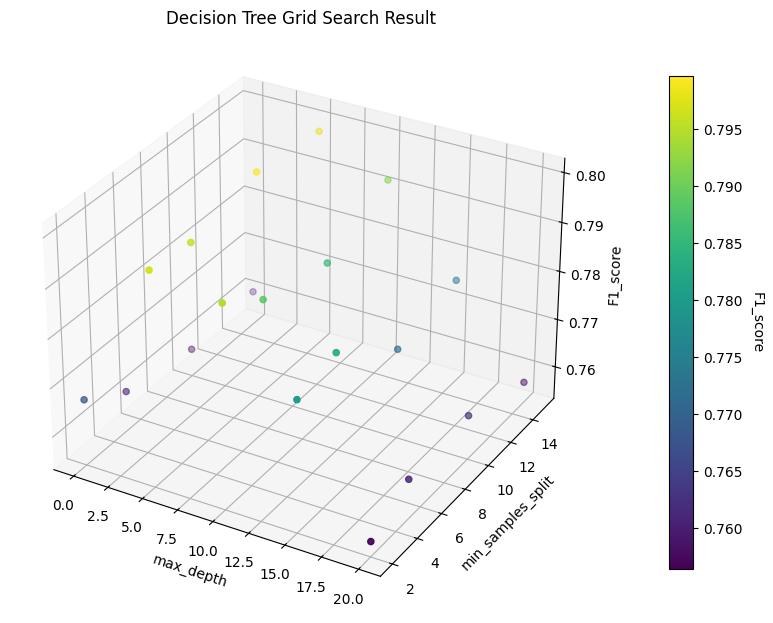

Model: decision_tree
Preprocess: default
Optimize: off
Training Time: 2.8438186645507812 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: decision_tree
Preprocess: default
Optimize: on
Training Time: 2.8493053913116455 seconds



In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

def tune_decision_tree_model_with_cross_val():
    patch_sklearn()
    # Load data
    X_train, y_train = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv')
    X_test, y_test = pd.read_csv('x_test.csv'), pd.read_csv('y_test.csv')

    # Define the parameter grid for grid search
    param_grid = {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 15],
    }

    # Create a Decision Tree model
    dt_model = DecisionTreeClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    f1_score_value = f1_score(y_test, y_pred)
    print(f'best_params = {best_params}')
    print(f'f1_score_value = {f1_score_value}')

    # Plot the results
    plot_results(grid_search)

    return best_params, f1_score_value

from mpl_toolkits.mplot3d import Axes3D

def plot_results(grid_search):
    # 提取参数值和对应的分数
    param_values = grid_search.cv_results_['params']
    scores = grid_search.cv_results_['mean_test_score']

    # 拆分参数值
    max_depth_values = [0 if value is None else value for value in [params['max_depth'] for params in param_values]]
    min_samples_split_values = [params['min_samples_split'] for params in param_values]

    # 创建3D图
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 对每个参数组合进行散点图
    scatter = ax.scatter(max_depth_values, min_samples_split_values, scores, c=scores, cmap='viridis', marker='o')

    # 设置标签和标题
    ax.set_xlabel('max_depth')
    ax.set_ylabel('min_samples_split')
    ax.set_zlabel('F1_score')
    ax.set_title('Decision Tree Grid Search Result')

    # 添加颜色条，手动设置颜色条范围
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
    cbar.set_label('F1_score', rotation=270, labelpad=15)

    # 显示图形
    plt.show()

# Run the tuning function
tune_decision_tree_model_with_cross_val()

## 随机森林 (Random Forest)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


best_params = {'max_depth': None, 'n_estimators': 150}
f1_score_value = 0.8505747126436782


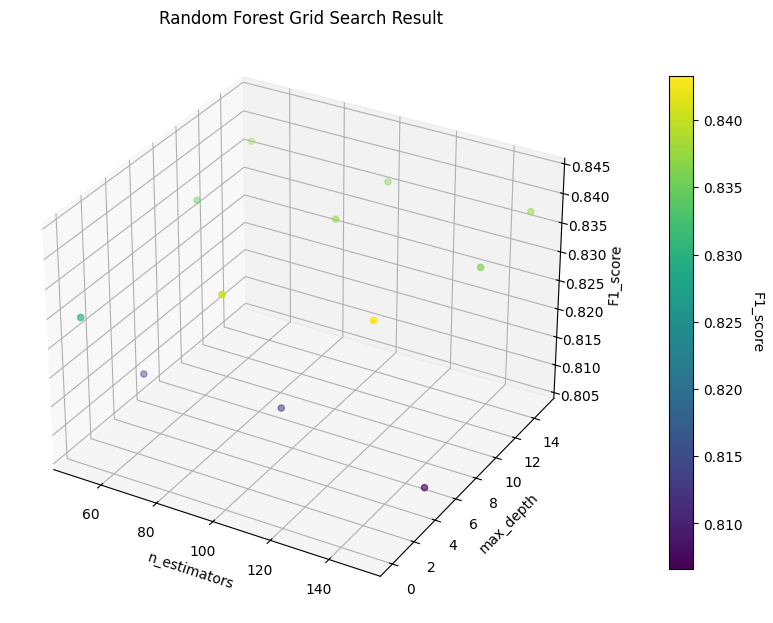

Model: random_forest
Preprocess: default
Optimize: off
Training Time: 1.2694942951202393 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: random_forest
Preprocess: default
Optimize: on
Training Time: 1.270655870437622 seconds



In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def tune_random_forest_model_with_cross_val():
    patch_sklearn()
    # Load data
    X_train, y_train = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    X_test, y_test = pd.read_csv('x_test.csv'), pd.read_csv('y_test.csv').values.ravel()

    # Define the parameter grid for grid search
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10, 15],
    }

    # Create a Random Forest model
    rf_model = RandomForestClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    f1_score_value = f1_score(y_test, y_pred)
    print(f'best_params = {best_params}')
    print(f'f1_score_value = {f1_score_value}')

    # Plot the results
    plot_results(grid_search)

    return best_params, f1_score_value

def plot_results(grid_search):
    # Extract parameter values and corresponding scores
    param_values = grid_search.cv_results_['params']
    scores = grid_search.cv_results_['mean_test_score']

    # Split parameter values
    n_estimators_values = [params['n_estimators'] for params in param_values]
    max_depth_values = [0 if value is None else value for value in [params['max_depth'] for params in param_values]]

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for each parameter combination
    scatter = ax.scatter(n_estimators_values, max_depth_values, scores, c=scores, cmap='viridis', marker='o')

    # Set labels and title
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('max_depth')
    ax.set_zlabel('F1_score')
    ax.set_title('Random Forest Grid Search Result')

    # Add color bar with manual color range setting
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
    cbar.set_label('F1_score', rotation=270, labelpad=15)

    # Show the plot
    plt.show()

# Run the tuning function
tune_random_forest_model_with_cross_val()

# 使用默认参数调用函数
trained_model1 = train_model_random_forest()
trained_model2 = train_model_random_forest(opt='on')



## 支持向量机 (Support Vector Machines) 

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


best_params = {'C': 1, 'kernel': 'poly'}
f1_score_value = 0.8156424581005587


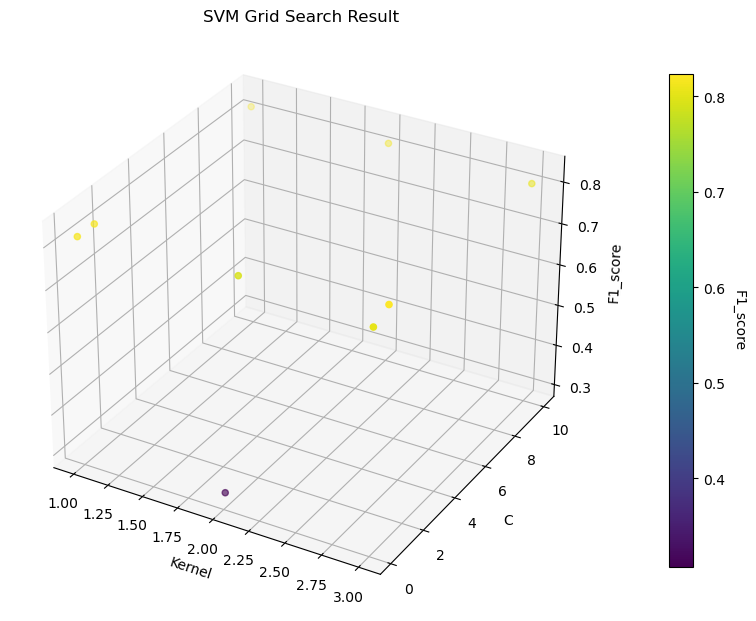

Model: svm
Preprocess: default
Optimize: off
Training Time: 3.646162509918213 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: svm
Preprocess: default
Optimize: on
Training Time: 3.6379659175872803 seconds



In [10]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def tune_svm_model_with_cross_val():
    patch_sklearn()
    # Load data
    X_train, y_train = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    X_test, y_test = pd.read_csv('x_test.csv'), pd.read_csv('y_test.csv').values.ravel()

    # Define the parameter grid for grid search
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10],
    }

    # Create an SVM model
    svm_model = SVC()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    f1_score_value = f1_score(y_test, y_pred)
    print(f'best_params = {best_params}')
    print(f'f1_score_value = {f1_score_value}')

    # Plot the results
    plot_results(grid_search)

    return best_params, f1_score_value

def plot_results(grid_search):
    # Extract parameter values and corresponding scores
    param_values = grid_search.cv_results_['params']
    scores = grid_search.cv_results_['mean_test_score']

    # Split parameter values
    kernel_values = [params['kernel'] for params in param_values]
    C_values = [params['C'] for params in param_values]

    # Map categorical kernel values to numerical representation
    kernel_mapping = {'linear': 1, 'rbf': 2, 'poly': 3}
    numeric_kernel_values = [kernel_mapping[k] for k in kernel_values]

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for each parameter combination
    scatter = ax.scatter(numeric_kernel_values, C_values, scores, c=scores, cmap='viridis', marker='o')

    # Set labels and title
    ax.set_xlabel('Kernel')
    ax.set_ylabel('C')
    ax.set_zlabel('F1_score')
    ax.set_title('SVM Grid Search Result')

    # Add color bar with manual color range setting
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
    cbar.set_label('F1_score', rotation=270, labelpad=15)

    # Show the plot
    plt.show()

# Run the tuning function
tune_svm_model_with_cross_val()


# 使用默认参数调用函数
trained_model1 = train_model_svm()
trained_model2 = train_model_svm(opt='on')


## K最近邻 (K-Nearest Neighbors，KNN):

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
c:\Users\SY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\SY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic i

best_params {'metric': 'manhattan', 'n_neighbors': 5}
f1_score_value 0.8666666666666666


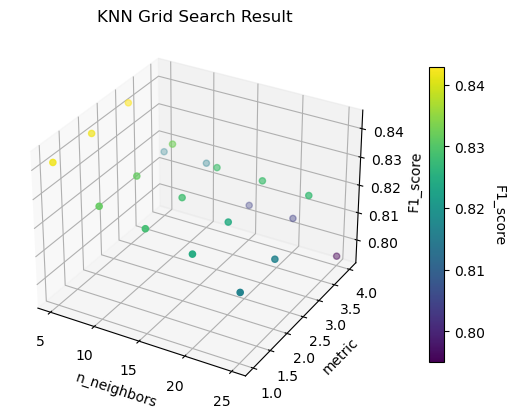

Model: knn
Preprocess: default
Optimize: off
Training Time: 0.17015552520751953 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: knn
Preprocess: default
Optimize: on
Training Time: 0.12015318870544434 seconds



In [13]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def tune_knn_model_with_cross_val():
    patch_sklearn() 
    # Load data
    X_train, y_train = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    X_test, y_test = pd.read_csv('x_test.csv'), pd.read_csv('y_test.csv').values.ravel()

    # Define the parameter grid for grid search
    param_grid = {
        'n_neighbors': [5, 10, 15, 20, 25],
        'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
    }

    # Create a KNN model
    knn_model = KNeighborsClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    f1_score_value = f1_score(y_test, y_pred)
    print(f'best_params {best_params}')
    print(f'f1_score_value {f1_score_value}')

    # Plot the results
    plot_results(grid_search)

    return best_params, f1_score_value

def plot_results(grid_search):
   # Extract parameter values and corresponding scores
    param_values = grid_search.cv_results_['params']
    scores = grid_search.cv_results_['mean_test_score']

    # Split parameter values
    n_neighbors_values = [params['n_neighbors'] for params in param_values]
    metric_values = [params['metric'] for params in param_values]

    metric_mapping = {'minkowski':1, 'euclidean':2, 'manhattan':3, 'chebyshev':4}
    numeric_metric_values = [metric_mapping[k] for k in metric_values]

    # Create 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(n_neighbors_values, numeric_metric_values, scores, c=scores, cmap='viridis', marker='o')

    # Set labels and title
    ax.set_xlabel('n_neighbors')
    ax.set_ylabel('metric')
    ax.set_zlabel('F1_score')
    ax.set_title('KNN Grid Search Result')

    # Add color bar with manual color range setting
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
    cbar.set_label('F1_score', rotation=270, labelpad=15)

    # Show the plot
    plt.show()

# Run the tuning function
tune_knn_model_with_cross_val()
